In [1]:
 #SVM Classification
import pandas as pd
import numpy as np
# from sklearn.preprocessing import StandardScaler

# from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


In [2]:
train = pd.read_csv("SalaryData_Train(1).csv")

In [3]:
df1 = train.copy()

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
train.mode()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,36,Private,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K


In [6]:
train.mean()

C:\Users\VAISHNAVI\AppData\Local\Temp\ipykernel_10552\3309660196.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.mean()


age               38.438115
educationno       10.121316
capitalgain     1092.044064
capitalloss       88.302311
hoursperweek      40.931269
dtype: float64

In [7]:
train.median()

C:\Users\VAISHNAVI\AppData\Local\Temp\ipykernel_10552\4279898166.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.median()


age             37.0
educationno     10.0
capitalgain      0.0
capitalloss      0.0
hoursperweek    40.0
dtype: float64

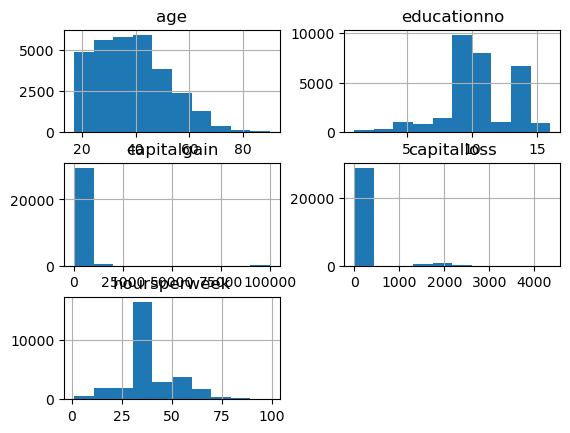

In [9]:
import matplotlib.pyplot as plt
train.hist()
plt.show()

In [10]:
tr1 = df1.iloc[:,0:13]
tr1 = pd.get_dummies(tr1)
tr1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
train.mean()

C:\Users\VAISHNAVI\AppData\Local\Temp\ipykernel_10552\3309660196.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.mean()


age               38.438115
educationno       10.121316
capitalgain     1092.044064
capitalloss       88.302311
hoursperweek      40.931269
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x20af3fedb50>,
 'caps': [<matplotlib.lines.Line2D at 0x20af3feef90>,
 'boxes': [<matplotlib.lines.Line2D at 0x20af3fece50>],
 'medians': [<matplotlib.lines.Line2D at 0x20af40006d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20af4001190>],
 'means': []}

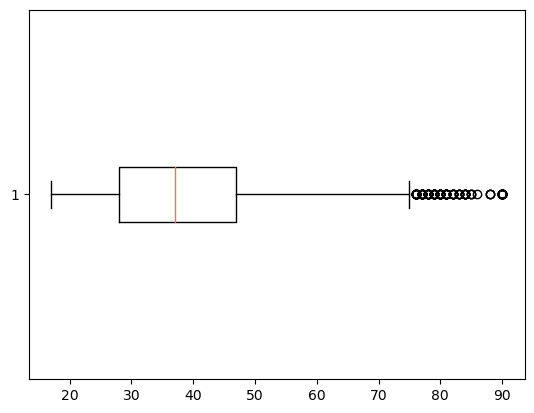

In [15]:
plt.boxplot(tr1["age"],vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x20afbf93290>,
 'caps': [<matplotlib.lines.Line2D at 0x20afbfb5390>,
 'boxes': [<matplotlib.lines.Line2D at 0x20afbf9f250>],
 'medians': [<matplotlib.lines.Line2D at 0x20afbfb6990>],
 'fliers': [<matplotlib.lines.Line2D at 0x20afbfb7490>],
 'means': []}

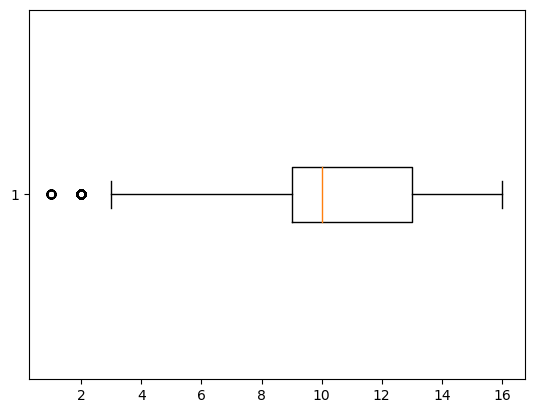

In [17]:
plt.boxplot(tr1["educationno"],vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x20a81168cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x20a81168250>,
 'boxes': [<matplotlib.lines.Line2D at 0x20a81168390>],
 'medians': [<matplotlib.lines.Line2D at 0x20a8116aed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20a8116ae50>],
 'means': []}

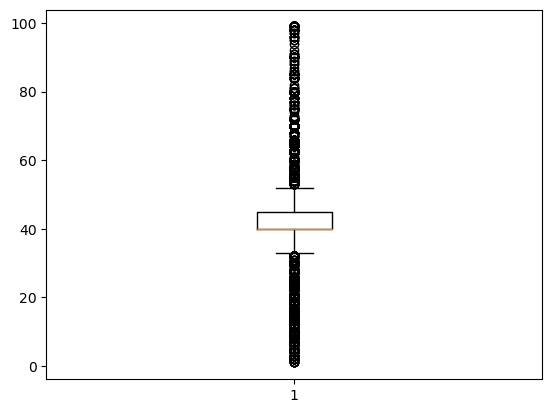

In [24]:
plt.boxplot(tr1["hoursperweek"])

(array([0.00346584, 0.01494203, 0.02254567, 0.0251981 , 0.29206812,
        0.04093587, 0.11796249, 0.0162152 ]),
 array([ 1.   ,  2.875,  4.75 ,  6.625,  8.5  , 10.375, 12.25 , 14.125,
        16.   ]),
 <BarContainer object of 8 artists>)

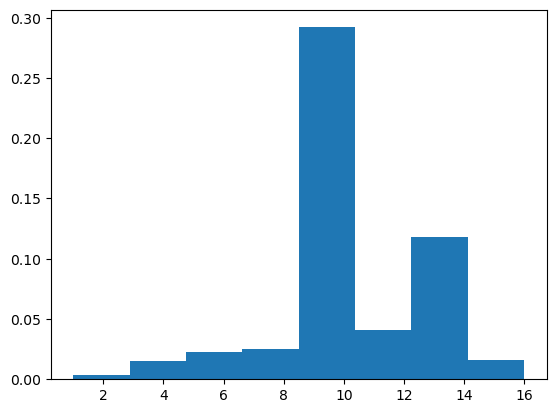

In [25]:
plt.hist(tr1["educationno"], bins=8, density  = True)

(array([0.02330143, 0.02661152, 0.02535798, 0.01899214, 0.01047892,
        0.003648  , 0.00092653, 0.00027251]),
 array([17.   , 26.125, 35.25 , 44.375, 53.5  , 62.625, 71.75 , 80.875,
        90.   ]),
 <BarContainer object of 8 artists>)

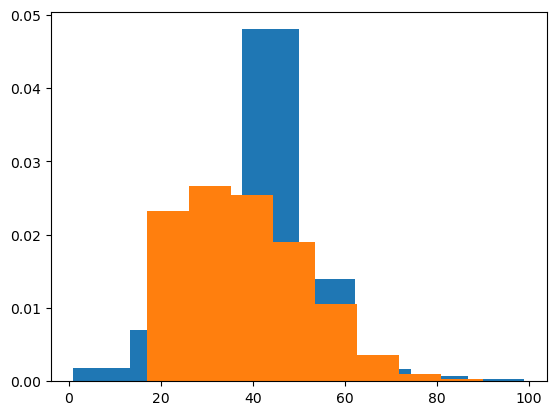

In [26]:
plt.hist(tr1["hoursperweek"], bins=8, density  = True)
plt.hist(tr1["age"], bins=8, density  = True)

In [27]:
import seaborn as sns

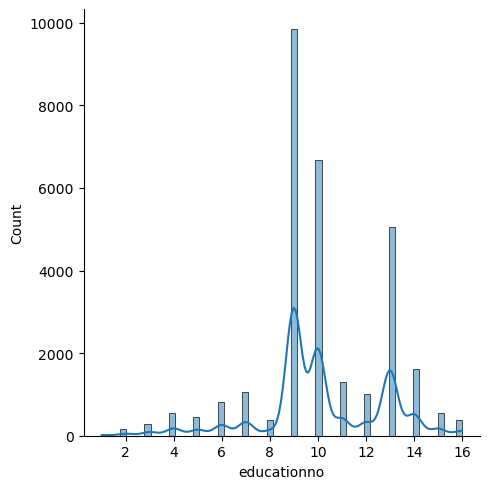

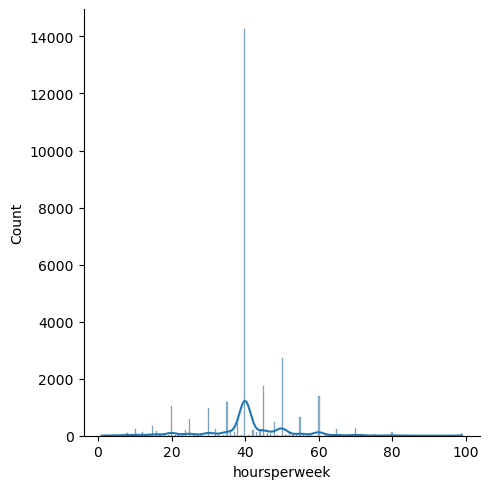

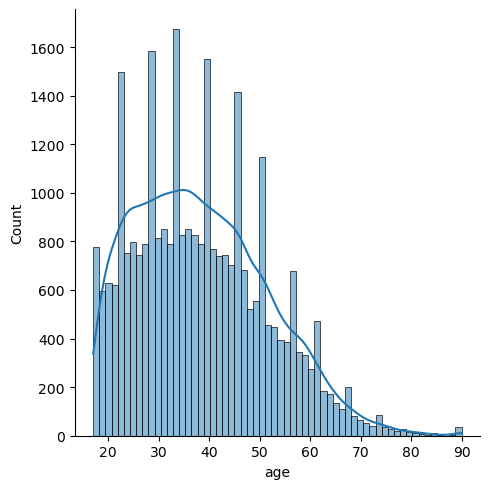

In [28]:
sns.displot(train["educationno"], kde=True)
sns.displot(train["hoursperweek"], kde=True)
sns.displot(train["age"],kde=True)

In [6]:
X = tr1.values[:,0:100]
Y = tr1.values[:,100]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((21112, 100), (21112,), (9049, 100), (9049,))

In [9]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [10]:
clf = SVC(kernel='linear',C=10)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 99.86738866173059


array([[9026,    8],
       [   4,   11]], dtype=int64)

In [11]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
confusion_matrix(y_test,y_pred)

array([[9026,    8],
       [   4,   11]], dtype=int64)

In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9034
           1       0.58      0.73      0.65        15

    accuracy                           1.00      9049
   macro avg       0.79      0.87      0.82      9049
weighted avg       1.00      1.00      1.00      9049

